Duplicate key in file '/mnt/lustre/home/akata/mdani31/official_semiollm/semiollm/visualization/.matplotlibrc', line 15 ('font.sans-serif      : Arial, sans-serif')
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, sans-serif
findfont: Generic

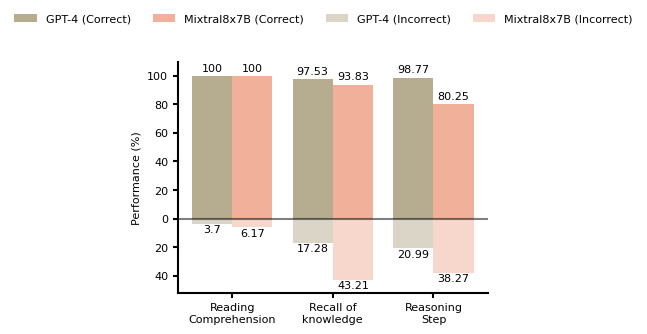

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib as mpl
import os

categories = ['Reading\nComprehension', 'Recall of\nknowledge', 'Reasoning\nStep']
gpt4_correct = [100, 97.53, 98.77]
mixtral_correct = [100, 93.83, 80.25]
gpt4_incorrect = [-3.7, -17.28, -20.99]
mixtral_incorrect = [-6.17, -43.21, -38.27]

current_dir = os.path.dirname(os.path.abspath('__file__'))
format_file = os.path.join(current_dir, '.matplotlibrc')
with mpl.rc_context(fname=format_file):
    fig, ax = plt.subplots(figsize=(4, 3))  # Swapped dimensions for transposition

    x_pos = np.arange(len(categories))

    # Vertical bars instead of horizontal
    ax.bar(x_pos - 0.2, gpt4_correct, 0.4, color='#b6ad90', label='GPT-4 (Correct)')
    ax.bar(x_pos + 0.2, mixtral_correct, 0.4, color='#f0b099', label='Mixtral8x7B (Correct)')

    ax.bar(x_pos - 0.2, gpt4_incorrect, 0.4, color='#b6ad90', alpha=0.5, label='GPT-4 (Incorrect)', bottom=0)
    ax.bar(x_pos + 0.2, mixtral_incorrect, 0.4, color='#f0b099', alpha=0.5, label='Mixtral8x7B (Incorrect)', bottom=0)

    def add_labels(values, positions, offset):
        for i, v in enumerate(values):
            value = abs(v)
            y_pos = v + offset if v >= 0 else v - offset -2.5
            ax.text(positions[i], y_pos, f'{value}', ha='center', va='bottom' if v >= 0 else 'top')

    add_labels(gpt4_correct, x_pos - 0.2, 2)
    add_labels(mixtral_correct, x_pos + 0.2, 2)
    add_labels(gpt4_incorrect, x_pos - 0.2, -2)
    add_labels(mixtral_incorrect, x_pos + 0.2, -2)

    ax.set_ylabel('Performance (%)')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(categories)
    ax.set_ylim(-52, 110)
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, pos: f'{int(abs(y))}'))

    ax.axhline(y=0, color='black', alpha=0.5)
    ax.legend(loc='upper right', bbox_to_anchor=(1.5, 1.25), ncol=4)


    #plt.savefig('reason_annotation_transposed.svg')
    plt.show()